In [35]:
# First XGBoost model for Pima Indians dataset

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from pandas import read_csv
from matplotlib import pyplot



In [36]:

filename="/media/sf_vmshare/rtsh/pima-indians-diabetes.csv"

# load data
data = read_csv(filename, header=None)



In [37]:
#convert into numpy array from dataframe
dataset = data.values

# split data into X(input features) and y(label) 
X = dataset[:,0:8]
Y = dataset[:,8]


In [38]:


model = XGBClassifier()


#learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
max_depth = range(1, 11, 2)
learning_rate = [ 0.1, 0.2]
n_estimators = range(50, 400, 50)

#Tuning Row Subsampling without replacement
subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]

#Tuning Column Subsampling By Tree
colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]

#Tuning Column Subsampling By Split
#colsample_bylevel = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]

# min samples split = 2
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)


In [39]:

grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)

In [40]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -0.476511 using {'n_estimators': 50}


-0.476511 (0.053662) with: {'n_estimators': 50}
-0.483013 (0.060755) with: {'n_estimators': 100}
-0.498663 (0.068543) with: {'n_estimators': 150}
-0.512333 (0.071502) with: {'n_estimators': 200}
-0.531319 (0.074653) with: {'n_estimators': 250}
-0.546261 (0.077276) with: {'n_estimators': 300}
-0.562447 (0.075138) with: {'n_estimators': 350}


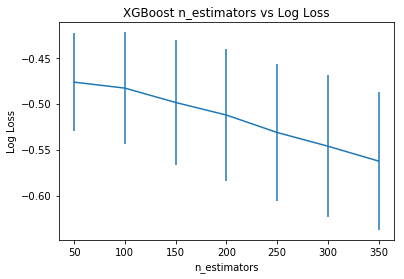

In [41]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.show()
#pyplot.savefig('n_estimators.png')

### 